# 191180094 - Merjem Kesten
# 191180093 - Elif Gizem Zedef
# 191180055 - Ali Mert Kocaman
# 191180081 - Fatih Talha Tümer

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sl
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score
from datetime import datetime 
# To avoid version error
pd.options.mode.chained_assignment = None

# GAME SALES DATASET

In [2]:
df_games = pd.read_csv('game_sales.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df_games.shape
print("There are " + str(len(df_games)) + ' games recorded in the dataset.')
print("There are " + str(len(df_games.columns)) + ' features of those games.')

There are 16598 games recorded in the dataset.
There are 11 features of those games.


In [6]:
# Let's drop the Rank column because we won't use it.
df_games.drop(columns="Rank",inplace=True)
df_games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# Checking if we have missing values
print(df_games.isnull().sum().sort_values(ascending=False))

Year            271
Publisher        58
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
df_games = df_games.dropna() #Dropped missing values, because they are not that much
df_games.shape

(16291, 10)

In [9]:
# We realized that 'Year' features type is float. So we wanted to change its type to int32
df_games["Year"] = df_games["Year"].astype("int32")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


# EXPLORING THE DATASET

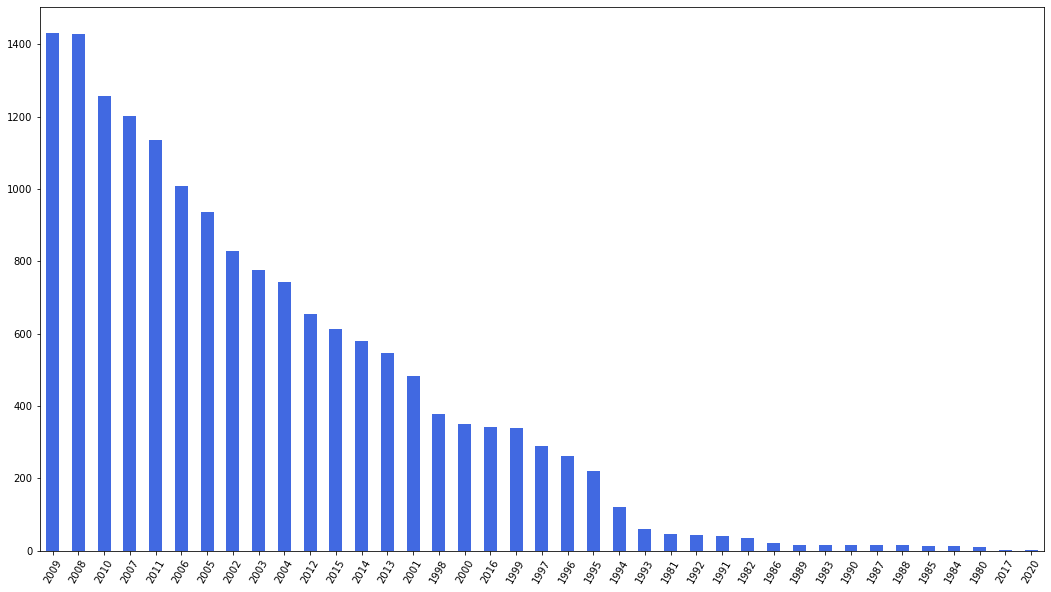

In [10]:
#Number of games released by year
f, ax = plt.subplots(figsize=(18,10))
df_games['Year'].value_counts().plot(kind="bar", rot=60, color = "royalblue");

In [11]:
df_games['Genre'].nunique()
# We have 12 different genres.

12

Text(0, 0.5, '')

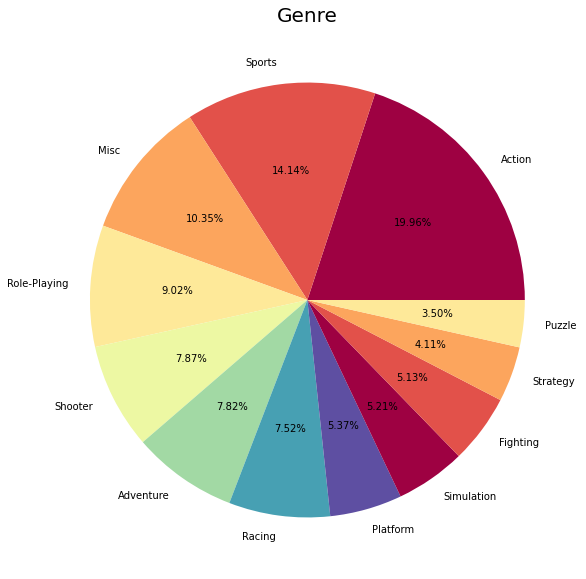

In [12]:
#Total sales rates of genres
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(10,10))
df_games.Genre.value_counts().plot(kind = 'pie', autopct = "%.2f%%", colors = colors)
plt.title('Genre', color = 'black',fontsize = 20);
plt.ylabel("")

In [13]:
df_games['Platform'].nunique()
# We have 31 different platforms.

31

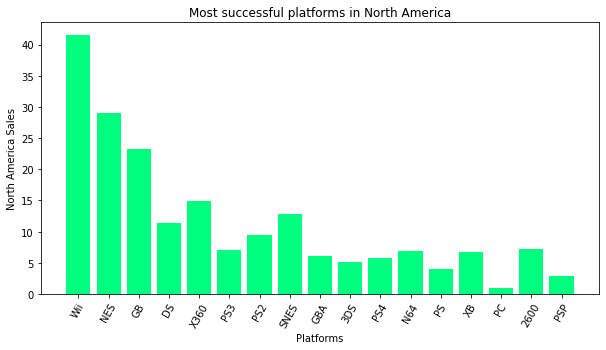

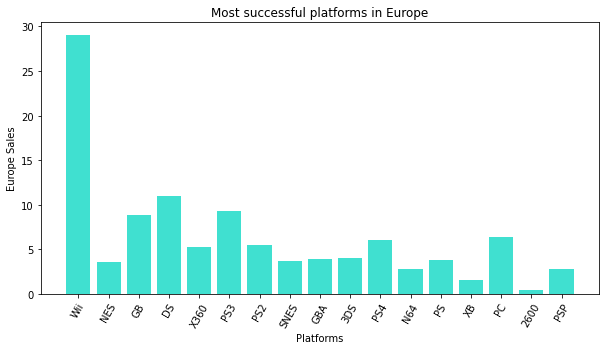

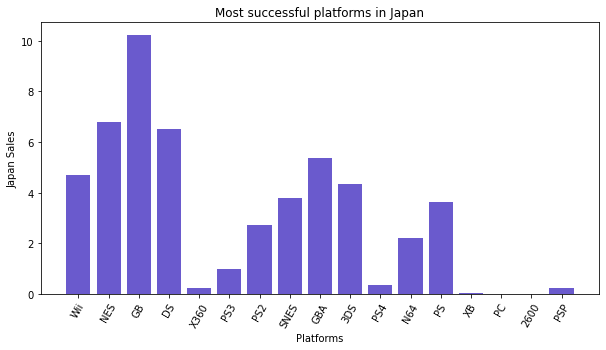

In [14]:
# Sales rates of gaming platforms by region

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='NA_Sales', color = 'springgreen')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('North America Sales')
plt.title('Most successful platforms in North America')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='EU_Sales', color = 'turquoise')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Europe Sales')
plt.title('Most successful platforms in Europe')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='JP_Sales', color = 'slateblue')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Japan Sales')
plt.title('Most successful platforms in Japan')
plt.show()


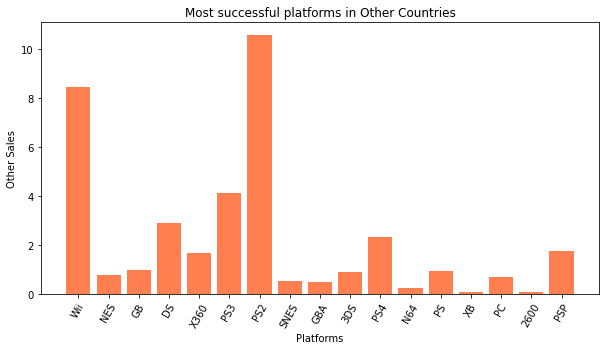

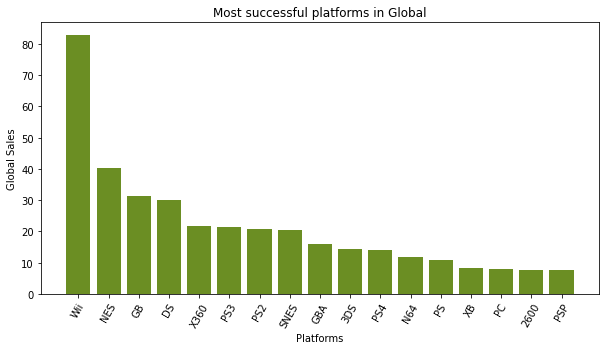

In [15]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='Other_Sales', color = 'coral')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Other Sales')
plt.title('Most successful platforms in Other Countries')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='Global_Sales', color = 'olivedrab')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Global Sales')
plt.title('Most successful platforms in Global')
plt.show()

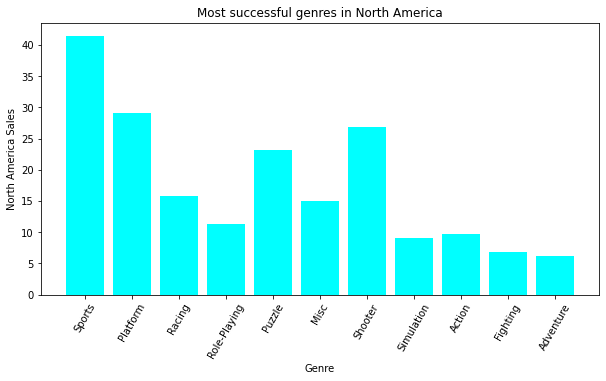

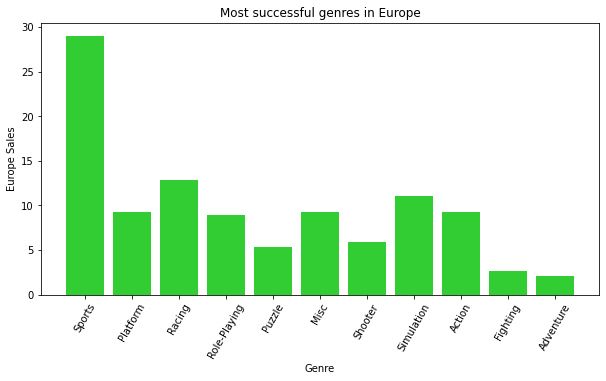

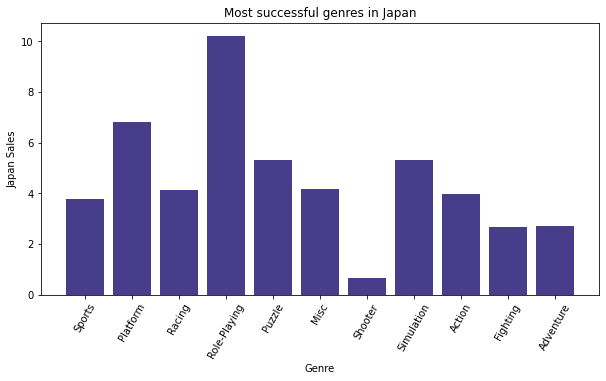

In [16]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='NA_Sales', color = 'aqua')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('North America Sales')
plt.title('Most successful genres in North America')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='EU_Sales', color = 'limegreen')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Europe Sales')
plt.title('Most successful genres in Europe')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='JP_Sales', color = 'darkslateblue')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Japan Sales')
plt.title('Most successful genres in Japan')
plt.show()

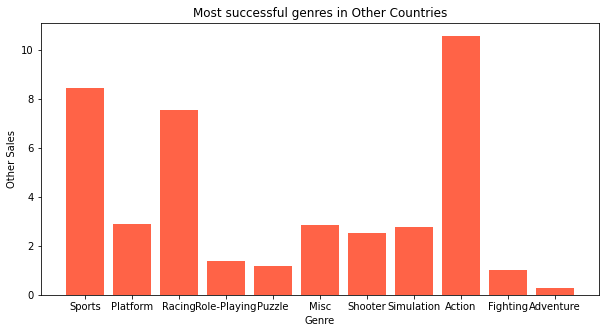

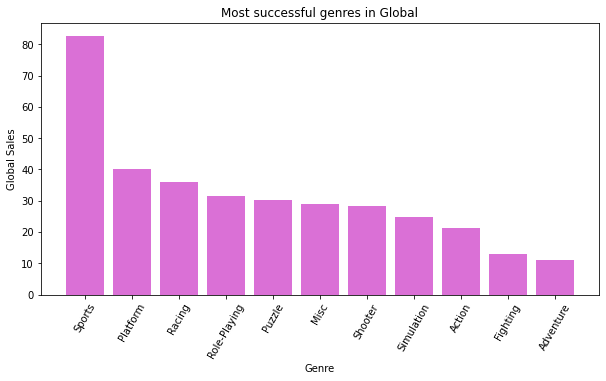

In [17]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='Other_Sales', color = 'tomato')

plt.xlabel('Genre')
plt.ylabel('Other Sales')
plt.title('Most successful genres in Other Countries')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='Global_Sales', color = 'orchid')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Most successful genres in Global')
plt.show()

In [18]:
df_games['Publisher'].nunique()

576

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

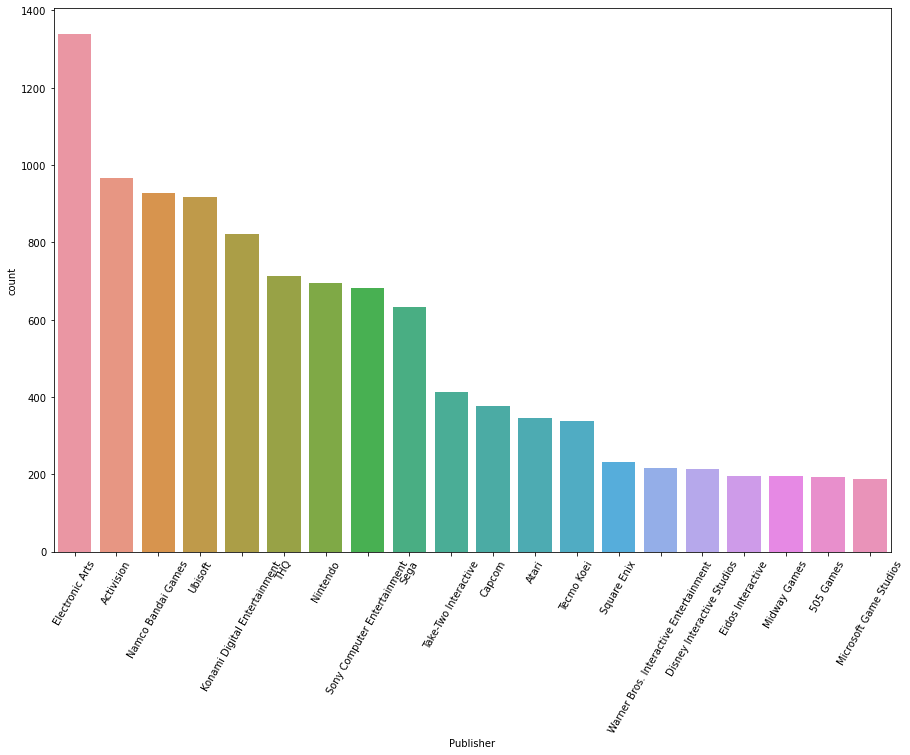

In [19]:
# How many games the first 20 platform published total?
publishers = df_games.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
publishers = pd.DataFrame(publishers).reset_index()
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=df_games, order = df_games.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=60)

In [105]:
df_games[['Name','Global_Sales', 'Publisher']].head(20) #highest sales games

#since the games are ranked by the largest global sales, we will analyze the first 20

,Name,Global_Sales,Publisher
0,Wii Sports,82.74,Nintendo
1,Super Mario Bros.,40.24,Nintendo
2,Mario Kart Wii,35.82,Nintendo
3,Wii Sports Resort,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,31.37,Nintendo
5,Tetris,30.26,Nintendo
6,New Super Mario Bros.,30.01,Nintendo
7,Wii Play,29.02,Nintendo
8,New Super Mario Bros. Wii,28.62,Nintendo
9,Duck Hunt,28.31,Nintendo


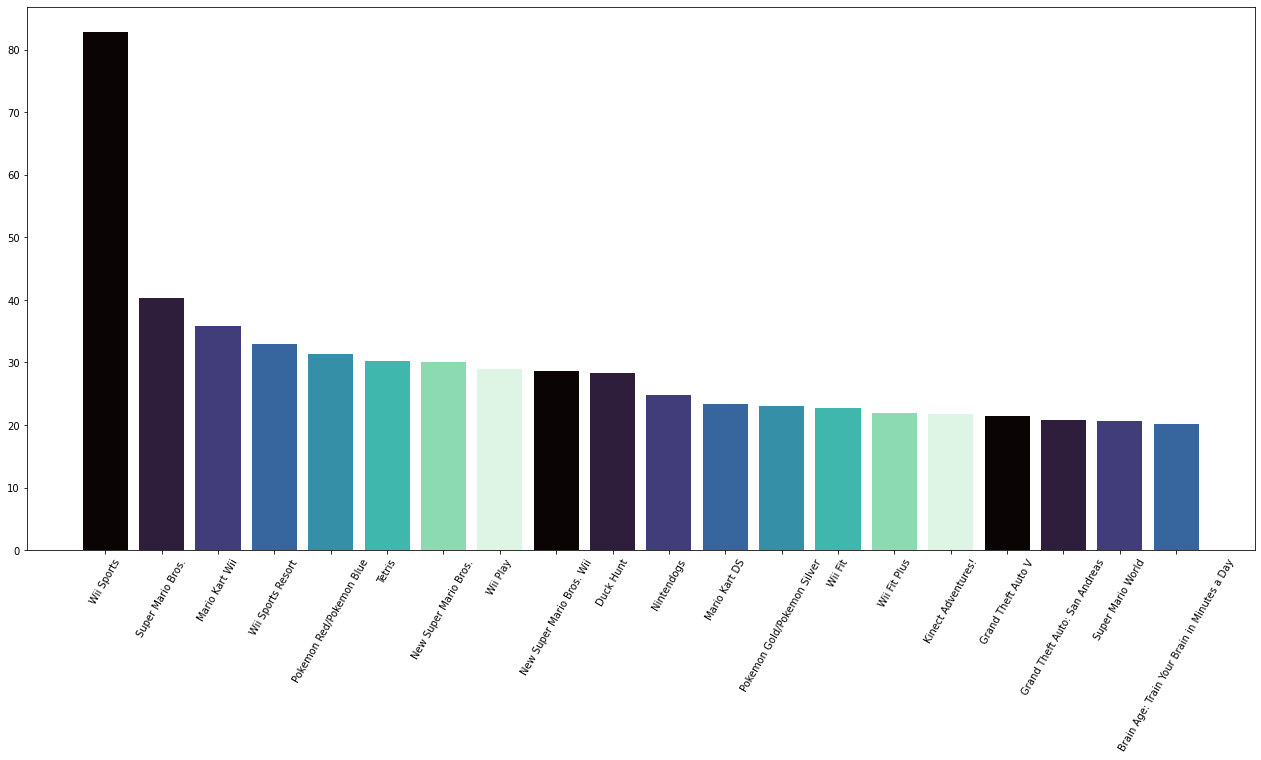

In [21]:
# Global sales rates of the first 20 games in the dataset
cmap = plt.get_cmap('mako')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(22,10))
plt.bar(x='Name', height='Global_Sales', data=hgs, color=colors)
plt.xticks(rotation=60)
plt.show()

Text(0, 0.5, '')

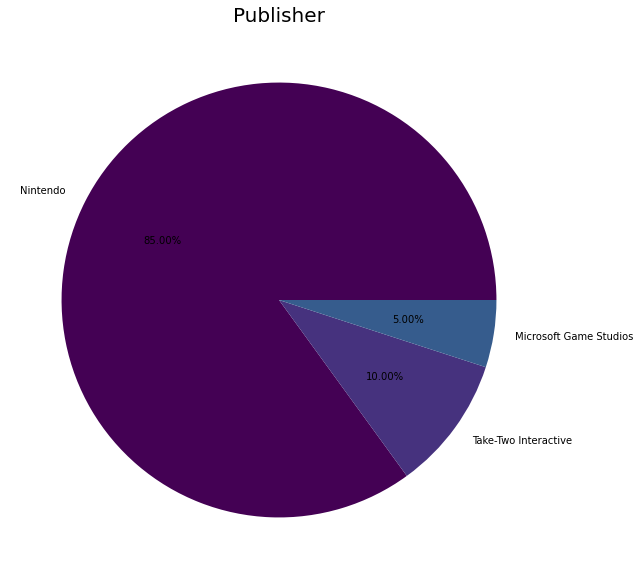

In [22]:
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(10,10))
hgs.Publisher.value_counts().plot(kind = 'pie', autopct = "%.2f%%", colors = colors)
plt.title('Publisher', color = 'black',fontsize = 20);
plt.ylabel("")


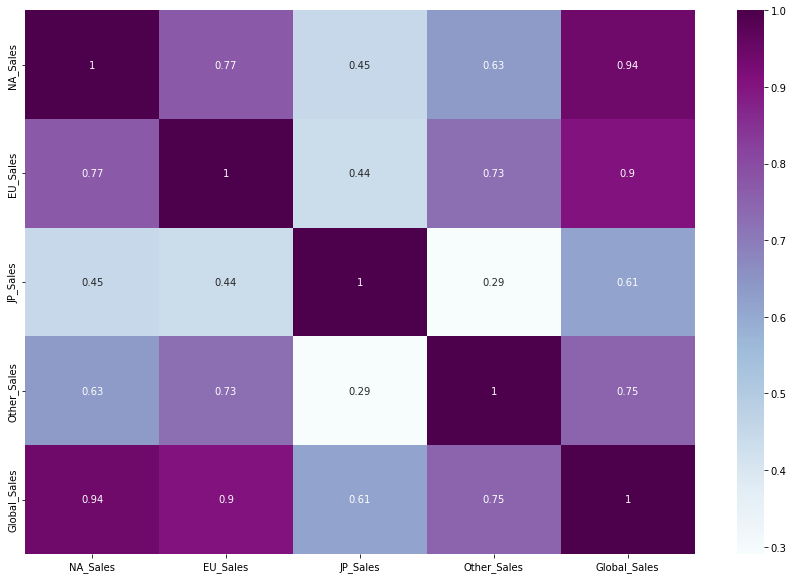

In [23]:
# Heatmap - Correlation
vgdropped = df_games.drop(columns='Year')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(vgdropped.corr(), annot = True, cmap="BuPu");

# Regressions

## Linear Regression

### Let's start with the Europe.

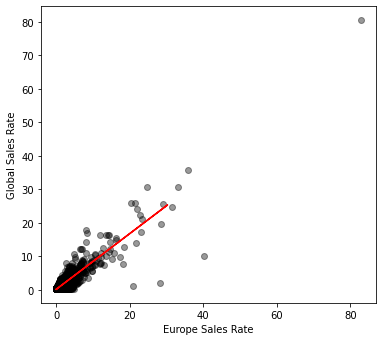

In [80]:
from sklearn.model_selection import train_test_split

y = df_games.iloc[:,-1]

X = df_games.iloc[:,6:7]
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="black", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"red")
plt.xlabel('Europe Sales Rate')
plt.ylabel('Global Sales Rate')
plt.show()

In [83]:
X = df_games.iloc[:,6:7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Accuracy of train set:", lr.score(X_train, y_train))
print("Accuracy of test set:", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Accuracy of train set: 0.83278233477734
Accuracy of test set: 0.7420365815108196
0.7420365815108196


### Continue with the Japan.

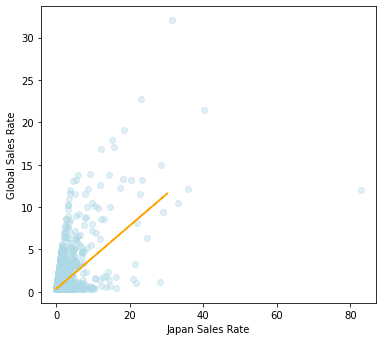

In [81]:
X = df_games.iloc[:,7:8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="lightblue", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"orange")
plt.xlabel('Japan Sales Rate')
plt.ylabel('Global Sales Rate')
plt.show()

In [67]:
X = df_games.iloc[:,7:8] ## Taking JP sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Accuracy of train set:", lr.score(X_train, y_train))
print("Accuracy of test set:", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Accuracy of train set: 0.36913386984081975
Accuracy of test set: 0.40720769746395813
0.40720769746395813


### And the last one is North America.

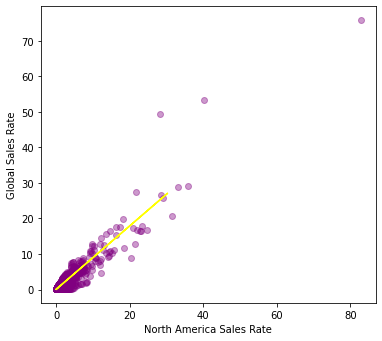

In [82]:
X = df_games.iloc[:,5:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="purple", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"yellow")
plt.xlabel('North America Sales Rate')
plt.ylabel('Global Sales Rate')
plt.show()

In [68]:
X = df_games.iloc[:,5:6] ## Taking NA sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Accuracy of train set:", lr.score(X_train, y_train))
print("Accuracy of test set:", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Accuracy of train set: 0.8920409880940867
Accuracy of test set: 0.8578403418219829
0.8578403418219829


## Random Forest Regression

### North America

In [31]:
from sklearn.ensemble import RandomForestRegressor

X = df_games.iloc[:,5:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Accuracy of train set:", rfr.score(X_train, y_train))
print("Accuracy of test set:", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Accuracy of train set: 0.9320257741749242
Accuracy of test set: 0.8523827970352871
0.8523827970352871


###   Europe

In [32]:
X = df_games.iloc[:,6:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

ranfor = RandomForestRegressor(n_estimators = 10)
ranfor.fit(X_train, y_train)
y_predranfor = ranfor.predict(X_test)
print("Accuracy of train set:", ranfor.score(X_train, y_train))
print("Accuracy of test set:", ranfor.score(X_test, y_test))
print(r2_score(y_test,y_predranfor))

Accuracy of train set: 0.8836003466797437
Accuracy of test set: 0.6892711440066943
0.6892711440066943


###  Japan

In [33]:
X = df_games.iloc[:,7:8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Accuracy of train set:", rfr.score(X_train, y_train))
print("Accuracy of test set:", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Accuracy of train set: 0.5298710724334535
Accuracy of test set: 0.3454349736606992
0.3454349736606992


# TWITCH DATASET


In [34]:
df = pd.read_csv('Twitch_game_data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              14000 non-null  int64  
 1   Game              13999 non-null  object 
 2   Month             14000 non-null  int64  
 3   Year              14000 non-null  int64  
 4   Hours_watched     14000 non-null  int64  
 5   Hours_Streamed    14000 non-null  object 
 6   Peak_viewers      14000 non-null  int64  
 7   Peak_channels     14000 non-null  int64  
 8   Streamers         14000 non-null  int64  
 9   Avg_viewers       14000 non-null  int64  
 10  Avg_channels      14000 non-null  int64  
 11  Avg_viewer_ratio  14000 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.3+ MB


In [36]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [37]:
df.shape

(14000, 12)

In [38]:
i=0
for item in df["Hours_Streamed"]:
    df["Hours_Streamed"].iloc[i] = np.int64(df["Hours_Streamed"].iloc[i][:-6])
    i+=1

In [39]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [40]:
df.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [41]:
df.dropna(inplace = True)

In [42]:
df.isnull().sum()

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [43]:
df_year = df.groupby(["Year"]).sum()
df_year = df_year[["Hours_watched"]]
df_year

,Hours_watched
Year,
2016,5082766384
2017,6044740005
2018,8588082625
2019,10029284068
2020,16976473071
2021,18792415955


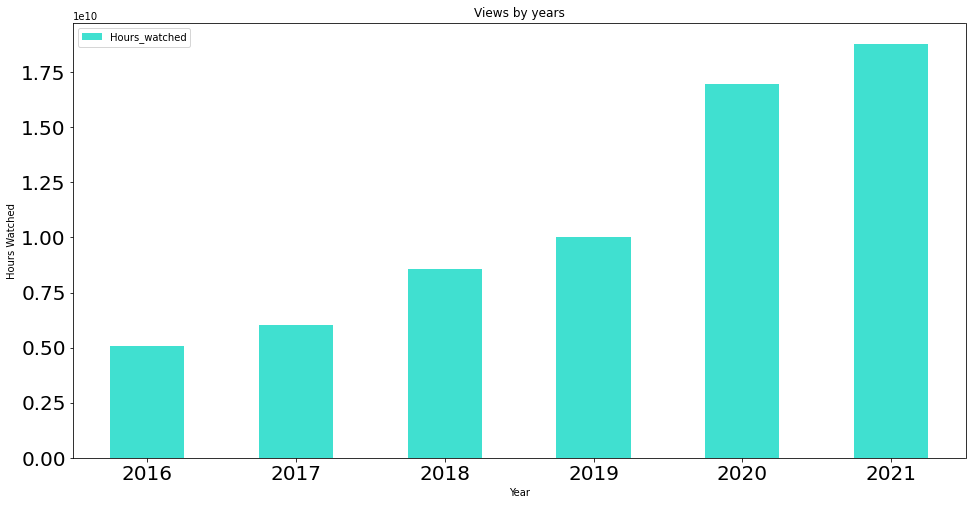

In [44]:
df_year.plot(kind='bar', color="turquoise", figsize=(16,8),rot=0, fontsize=20)
plt.title("Views by years")
plt.ylabel("Hours Watched")
plt.show()

In [45]:
df_month = df.groupby(["Month"]).mean()
df_month = df_month[["Hours_watched"]]
df_month

,Hours_watched
Month,
1,4.486574e+06
2,4.138724e+06
3,4.646377e+06
4,5.111525e+06
5,5.146535e+06
6,4.770526e+06
7,4.724070e+06
8,4.879637e+06
9,4.612934e+06


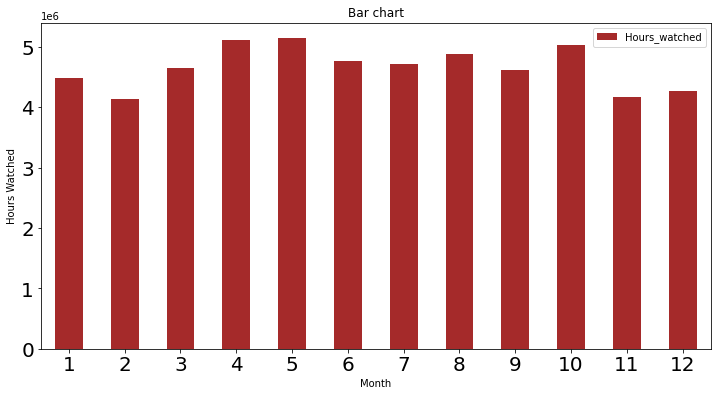

In [46]:
df_month.plot(kind='bar', color="brown", ylim=0, figsize=(12,6), rot=0, fontsize=20)
plt.title("Bar chart")
plt.ylabel("Hours Watched")
plt.xticks(fontsize=20)
plt.show()

In [47]:
rank_one_w = df[df.Rank==1].groupby("Game").sum()
rank_one_w = rank_one_w[["Rank", "Hours_watched"]]
rank_one_w = rank_one_w.sort_values("Rank")
rank_one_w.drop(columns="Hours_watched", inplace=True)
rank_one_w

,Rank
Game,
Apex Legends,1
PLAYERUNKNOWN'S BATTLEGROUNDS,1
VALORANT,1
World of Warcraft,1
Fortnite,16
Just Chatting,19
League of Legends,31


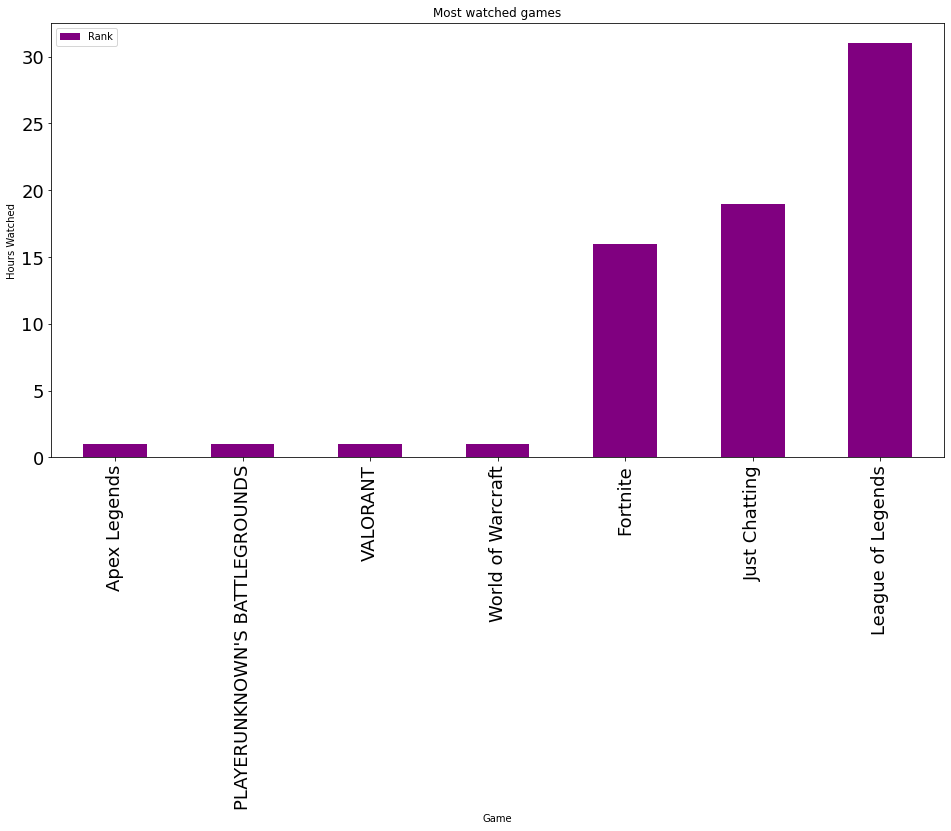

In [48]:
rank_one_w.plot(kind='bar', color="purple", figsize=(16,8), rot=90, fontsize=18)
plt.title("Most watched games")
plt.ylabel("Hours Watched")
plt.show()

In [49]:
df['Date'] = df.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}", '%Y-%m'),axis=1)

In [50]:
df.tail(50)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
13950,151,Makers & Crafting,10,2021,897605,75168,14126,175,6635,1208,101,11.94,2021-10-01
13951,152,Hot Wheels Unleashed,10,2021,895894,16562,60203,176,3560,1205,22,54.09,2021-10-01
13952,153,Lineage 2,10,2021,882897,45632,4071,167,1515,1188,61,19.35,2021-10-01
13953,154,Resident Evil Village,10,2021,874496,66653,18189,357,9731,1176,89,13.12,2021-10-01
13954,155,Gwent: The Witcher Card Game,10,2021,861515,12996,11297,57,863,1159,17,66.29,2021-10-01
13955,156,Software and Game Development,10,2021,854624,67062,6348,221,4768,1150,90,12.74,2021-10-01
13956,157,Pok<U+00E9>mon GO,10,2021,851570,24791,22243,121,2092,1146,33,34.35,2021-10-01
13957,158,Hollow Knight,10,2021,832957,67344,11344,171,8559,1121,90,12.37,2021-10-01
13958,159,Super Mario World,10,2021,829634,18525,8108,60,1813,1116,24,44.78,2021-10-01
13959,160,Mario Kart 8,10,2021,828607,23938,37776,109,5405,1115,32,34.61,2021-10-01


(50.0, 0.0)

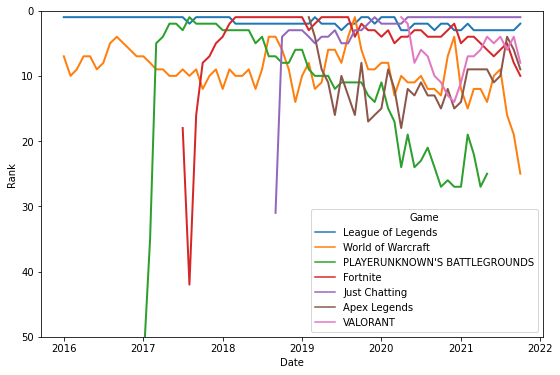

In [51]:
dfGame=df[df['Game'].isin(df[df['Rank']==1].Game.value_counts().index)]
fig,ax=plt.subplots(figsize=(9, 6))
sns.lineplot(ax=ax,data=dfGame, x="Date", y="Rank",hue="Game",linewidth = 2)
ax.axes.set_ylim(50,0)

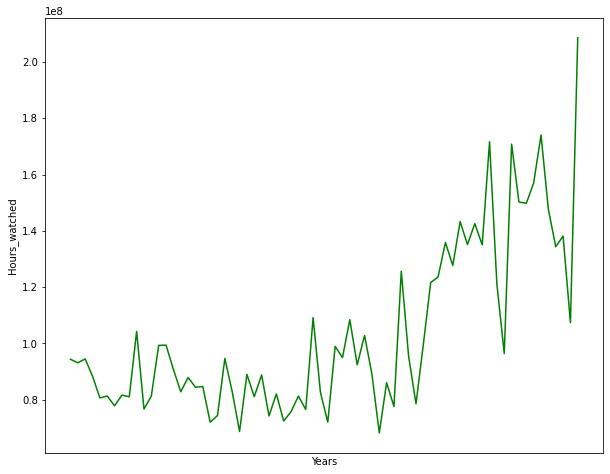

In [52]:
lol = df[df.Game== "League of Legends"]
lol = lol["Hours_watched"]
lol.plot(kind='line', color="green", figsize=(10,8))
plt.xticks([])
plt.ylabel("Hours_watched")
plt.xlabel("Years")
plt.show()

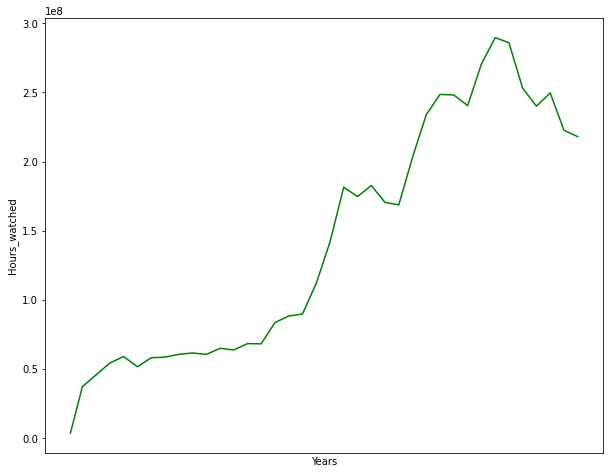

In [53]:
jc = df[df.Game== "Just Chatting"]
jc = jc["Hours_watched"]
jc.plot(kind='line', color="green", figsize=(10,8))
plt.xticks([])
plt.ylabel("Hours_watched")
plt.xlabel("Years")
plt.show()

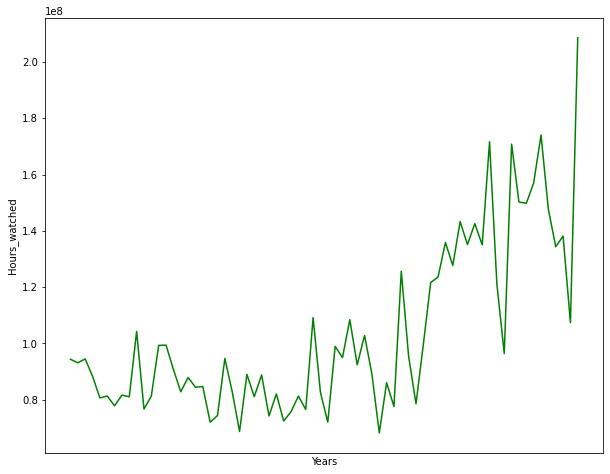

In [54]:
fort = df[df.Game== "League of Legends"]
fort = fort["Hours_watched"]
fort.plot(kind='line', color="green", figsize=(10,8))
plt.xticks([])
plt.ylabel("Hours_watched")
plt.xlabel("Years")
plt.show()

In [55]:
total_watch = df.groupby('Game').Hours_watched.sum().sort_values(ascending=False)
total_watch = total_watch[0:5]
#total_watch.drop(columns="Hours_watched", inplace=True)
total_watch

Game
League of Legends                   7253089573
Just Chatting                       5414645656
Fortnite                            4409912243
Grand Theft Auto V                  3336533065
Counter-Strike: Global Offensive    3161718669
Name: Hours_watched, dtype: int64

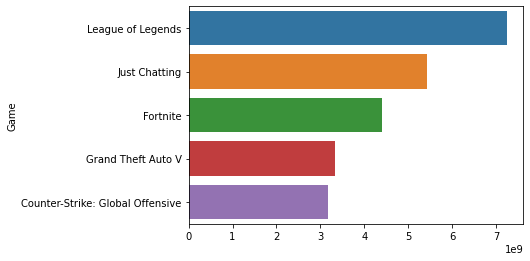

In [56]:
ax=sns.barplot(x=total_watch.values, y=total_watch.index)

<AxesSubplot:xlabel='Date', ylabel='Hours_watched'>

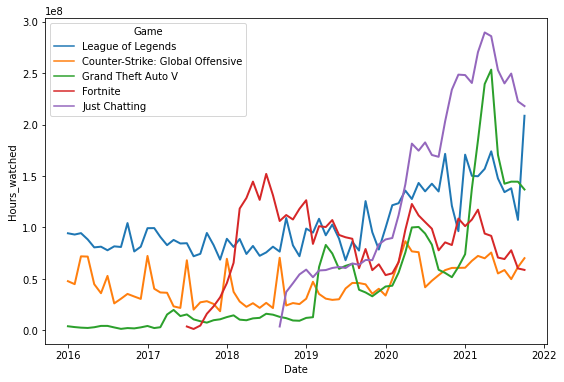

In [57]:
df_watch=df[df['Game'].isin(total_watch.index)]
fig,ax=plt.subplots(figsize=(9, 6))
sns.lineplot(ax=ax,data=df_watch, x="Date", y="Hours_watched",hue="Game",linewidth = 2)

<AxesSubplot:xlabel='Date', ylabel='Hours_watched'>

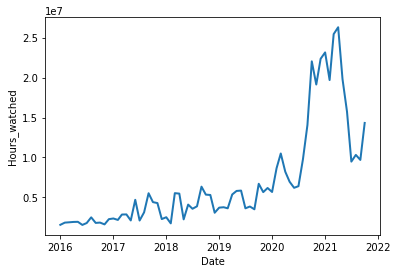

In [58]:
df_rocket=df[df['Game']=='Rocket League']
fig,ax=plt.subplots()
sns.lineplot(ax=ax,data=df_rocket, x="Date", y="Hours_watched",linewidth = 2)

<AxesSubplot:xlabel='Date', ylabel='Avg_viewers'>

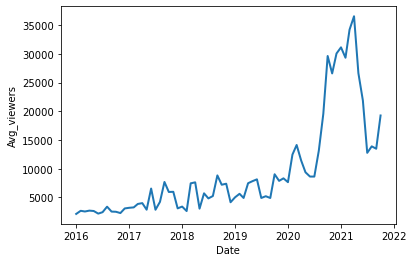

In [59]:
fig,ax=plt.subplots()
sns.lineplot(ax=ax,data=df_rocket, x="Date", y="Avg_viewers",linewidth = 2)

<AxesSubplot:xlabel='Date', ylabel='Streamers'>

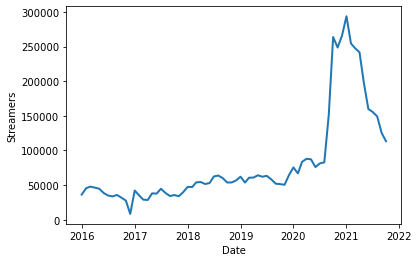

In [60]:
fig,ax=plt.subplots()
sns.lineplot(ax=ax,data=df_rocket, x="Date", y="Streamers",linewidth = 2)

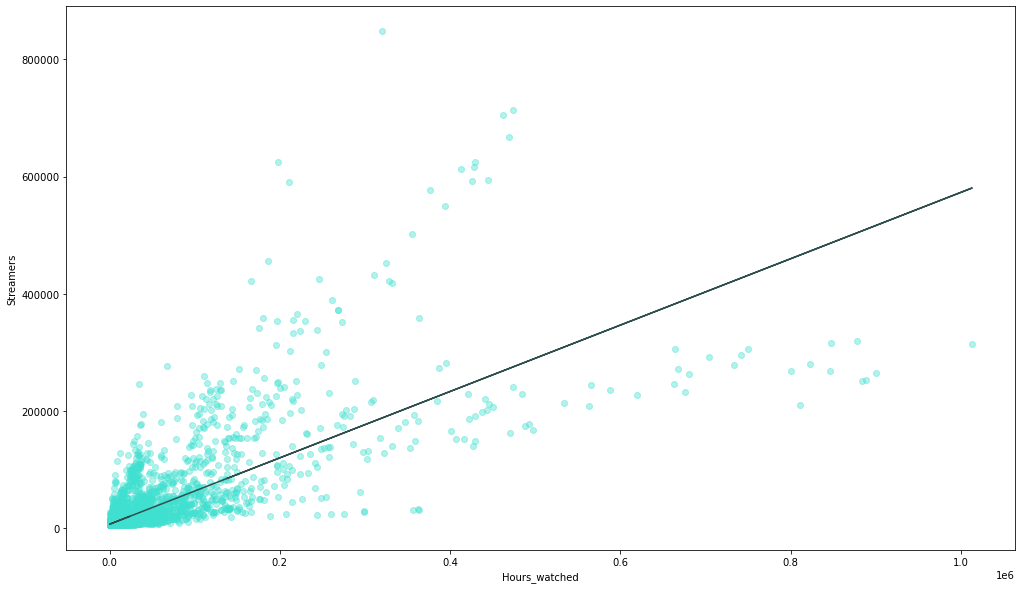

In [103]:
fig = plt.figure(figsize=(17,10))
Y= df.iloc[:,8:9].squeeze()#Streamers
X = df.iloc[:,4:5]#Hours_watched
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)
#X_train.to_frame()
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


plt.scatter(x=y_train, y=y_pred_train, c="turquoise", alpha=0.4)

a = np.polyfit(y_train,y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"darkslategray")
plt.xlabel('Hours_watched')
plt.ylabel('Streamers')
plt.show()

In [104]:
print("Accuracy of train set:", model.score(X_train, y_train))
print("Accuracy of test set:", model.score(X_test, y_test))

Accuracy of train set: 0.5657273881898118
Accuracy of test set: 0.5672329300863017
